# Sage Shaw

### ME 571 - Spring 2018

# HW 3 - Problem 3

In [17]:
import matplotlib.pyplot as plt
import numpy as np


# Donna's Node Centered

In [217]:
%%bash
mpicc demo_util.c hw3p3_node.c -o bin/hw3p3_node -lm
mpirun -n 4 bin/hw3p3_node -p 5 --itermax 12 --tol 1.0e-10 > csv/results_node_CG.csv

iterations: 10
residual: 0
nodes: 129
error: nan


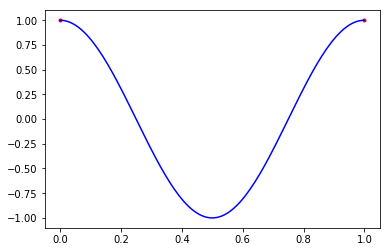

In [218]:
A = np.genfromtxt('csv/results_node_CG.csv', delimiter=',')
print("iterations: %d" % A[-2])
print("residual: %g" % A[-1])
A = A[:-2]
print("nodes: %d" % len(A))
x = np.linspace(0,1,len(A))
print("error: %g" % np.max(np.abs(A - np.cos(2*np.pi*x))))
plt.plot(x,A,'r.')
plt.plot(x, np.cos(2*np.pi*x), 'b-')

# Cell centered

In [91]:
%%bash
mpicc demo_util.c hw3p3_cell.c -o hw3p3_cell -lm
mpirun -n 4 ./hw3p3_cell -p 2 --itermax 4 --tol 1.0e-10 > results_cell_CG.csv

iterations: 4
residual: 2.37272
cells: 16
error: 6.09281


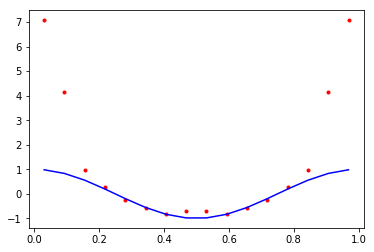

In [92]:
A = np.genfromtxt('results_cell_CG.csv', delimiter=',')
print("iterations: %d" % A[-2])
print("residual: %g" % A[-1])
A = A[:-2]
cells = len(A)
h = 1/cells
print("cells: %d" % len(A))
x = np.linspace(h/2,1-h/2,cells)
print("error: %g" % np.max(np.abs(A - np.cos(2*np.pi*x))))
plt.plot(x,A,'r.')
plt.plot(x, np.cos(2*np.pi*x), 'b-')

In [183]:
def cg_solve(A, x, b, tol, max_iter=10**9):
    #n = len(x)
    #N = int(np.sqrt(n))
    #assert N**2 == n
    #assert N>= 3
    b_old = b
    b[0] = 2 - x[0] - b_old[0]
    b[-1] = 2 - x[-1] - b_old[-1]
    x_old = x
    r = b - A@x
    #print(r)
    res_norms = [np.linalg.norm(r)]
    
    iterations = 1
    delta = np.dot(r, r)
    #print(delta)
    b_delta = np.dot(b,b)
    p = r
    while delta > b_delta * tol**2 and iterations < max_iter:
        s = A.dot(p)
        alpha = delta/np.dot(p,s)
        #print('alpha: %f'%alpha)
        x_new = x_old + alpha*p
        r -= alpha * s
        res_norms.append(np.linalg.norm(r))
        delta_new = np.dot(r,r)
        p = r + delta_new/delta * p
        x_old, delta = x_new, delta_new
        iterations += 1
        b[0] = 2 - x[0] - b_old[0]
        b[-1] = 2 - x[-1] - b_old[-1]
    #cond = (1+np.cos(np.pi/(N+1)))/(1-np.cos(np.pi/(N+1)))
    return x_new, iterations, res_norms

141


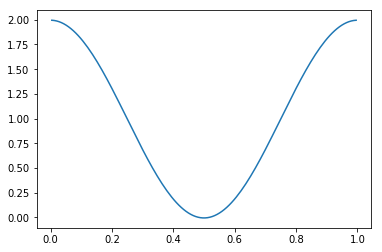

In [184]:
def foo(x):
    return -(2*np.pi)**2*np.cos(2*np.pi*x)

N = 128
h = 1/N
xs = np.linspace(h/2,1-h/2,N)
A = np.diag([2]*N) + np.diag([-1]*(N-1),k=1) + np.diag([-1]*(N-1),k=-1)
b = np.array([-h**2*foo(xi) for xi in xs])

u = np.zeros(N)
u_new, iterations, res_norms = cg_solve(A,u, b, tol=10**-5, max_iter=1000)
plt.plot(xs, u_new)
print(iterations)

In [170]:
A

array([[ 2, -1,  0, ...,  0,  0,  0],
       [-1,  2, -1, ...,  0,  0,  0],
       [ 0, -1,  2, ...,  0,  0,  0],
       ..., 
       [ 0,  0,  0, ...,  2, -1,  0],
       [ 0,  0,  0, ..., -1,  2, -1],
       [ 0,  0,  0, ...,  0, -1,  2]])